# Problema 55
## 55)

## Probemos con 3 partículas y 1 dimensión, después aumentamos la cantidad...

In [215]:
#Comencemos probando en 1-D (copiamos y pegamos de P53-54):

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA

L = 1 #Lado del box
c = 10 #subdivisiones
n = 3 #cant de partículas

#Tiramos las partículas y las guardamos en un DataFrame, donde a cada una le asignaremos un número de celda

np.random.seed(2) #Para poder replicar resultados
pos = np.random.uniform(0,L,n)
df = pd.DataFrame(pos,columns=['x']) #Guardamos (x)

p = np.arange(0,n)
df['ID'] = p #Esta es la columna que indica en qué celda se encuentra
df

,x,ID
0,0.435995,0
1,0.025926,1
2,0.549662,2


In [275]:
#Creamos las columnas con los lugares en el box de cada celda:

px = np.arange(0,n) #para guardar integers

df['px'] = px

#Veamos en qué celda está c/u:

for k in range(n): #Dada 1 partícula
    for i in range(c): 
        if i/c <= df['x'][k] < (i+1)/c: #En qué x está
            df.loc[k,'px'] = i

#Ahora que tenemos lo que queremos, ordenémoslos:

df.sort_values(['px'],axis=0,ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

df

,x,ID,px
0,0.025926,1,0
1,0.435995,0,4
2,0.549662,2,5


## Su fueran densidades para partículas puntuales:

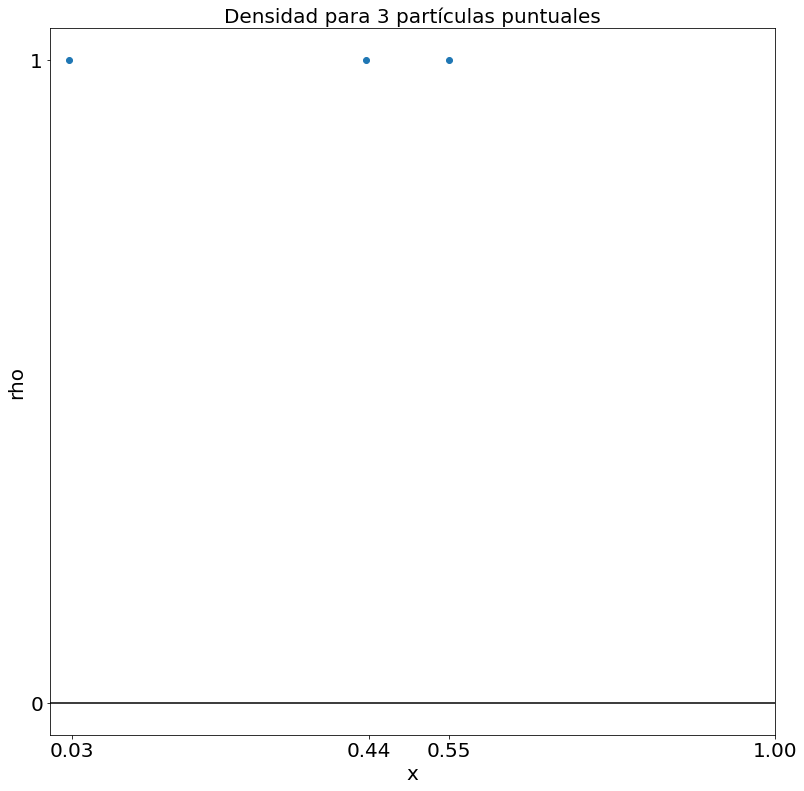

In [276]:
plt.figure(figsize=(13,13))
plt.scatter(df['x'],[1]*n)
plt.axhline(0,c='k')
plt.xlim(0,L)
plt.xlabel('x',fontsize=20)
plt.ylabel('rho',fontsize=20)
plt.xticks([0.03,0.44,0.55,1],fontsize=20)
plt.yticks([0,1],fontsize=20)
plt.title(f'Densidad para {n} partículas puntuales',fontsize=20);

## Apliquemos un kerner Gausseano:

In [277]:
#Antes de meternos en celdas, calculemos un campo de densidades con un kernel Gausseano (Sumando las contribuciones de cada partícula):

def Gauss(mu,sigma,x):
    y = (np.exp(-0.5*(((x-mu)/sigma)**2)))
    return y

t = np.linspace(-2,L+2,1000) #Dominio

rho_g = np.zeros(len(t))
for i in range(len(df)):
    rho_g += Gauss(df['x'][i],0.1,t)
    
#rho_g = rho_g/max(rho_g)

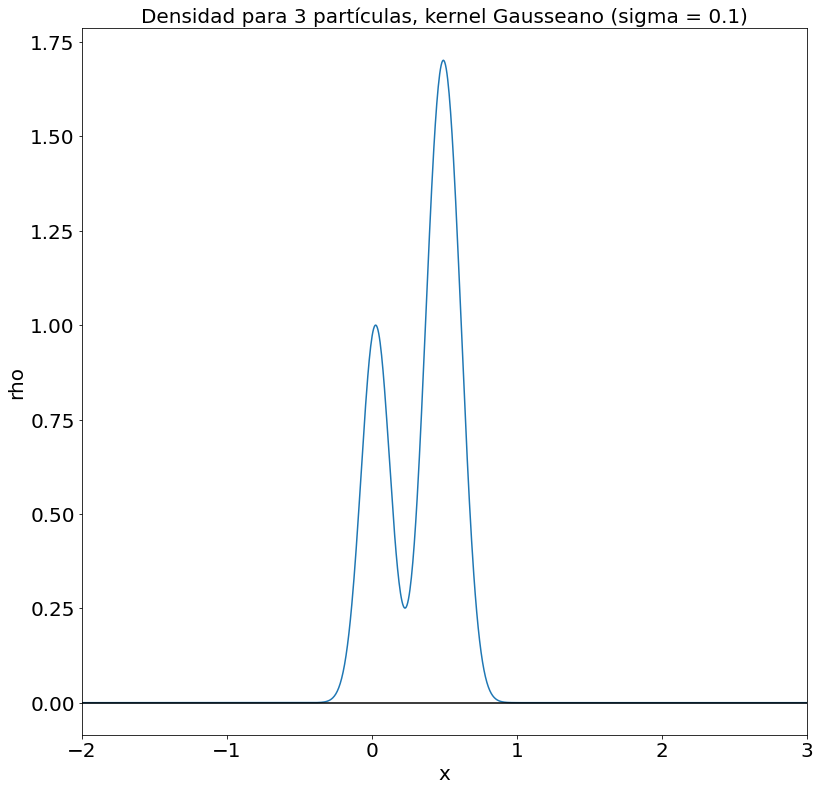

In [278]:
plt.figure(figsize=(13,13))
plt.plot(t,rho_g)
plt.axhline(0,c='k')
plt.xlim(-2,L+2)
plt.xlabel('x',fontsize=20)
plt.ylabel('rho',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, kernel Gausseano (sigma = {0.1})',fontsize=20);

## Por último, un spline cúbico (Eq 280 del Springel):

In [279]:
#Ahora, pasemos al Kernel tipo spline cúbico:

def spline(x1,x2,h):
    r = LA.norm(x1-x2)
    q = 0.5*(r/h)
    if q <= 0.5:
        w = 1 - 6*q**2 + 6*q**3
        #w = w*8/np.pi
    elif 0.5 < q <= 1:
        w = 2*(1-q)**3
    else:
        w = 0
        
    return w

"""#¿No quiero el campo en todo el espacio, sólo en la partícula i?

#Si bien podemos buscar qué partículas están (e.g.) en celdas contiguas y sólo usar esas para calcular rho_i, hagamos fuerza bruta primero
#(porque ya pusimos dentro de "spline" que si q > 1 => 0)...

rho_i = np.zeros(len(df)) #rho de cada partícula: Por cada que calculo, reviso TODAS las otras (¡i == j también suma!)

for i in range(len(df)):
    S_max = 0
    for j in range(len(df)):
        
        #Reviso que las partículas lejanas efectivamente no sumen:
        """"""aux = spline(df['x'][i],df['x'][j],1/5)
        if aux == 0:
            print(df['px'][i],df['px'][j])"""""";
            
        #Sumo las densidades según el kernel de las cercanas:
        rho_i[i] += spline(df['x'][i],df['x'][j],0.2)
        print(f'rho de la part {i} desp de sumar la contribución de {j} = {rho_i[i]:.3f}')
        
    print('\n')

#rho_i""";

In [280]:
#Calculo esto para todo el dominio

rho_s = np.zeros(len(t))
for i in range(len(df)):
    for j in range(len(t)):
        rho_s[j] += spline(df['x'][i],t[j],0.2)
    
#rho_s

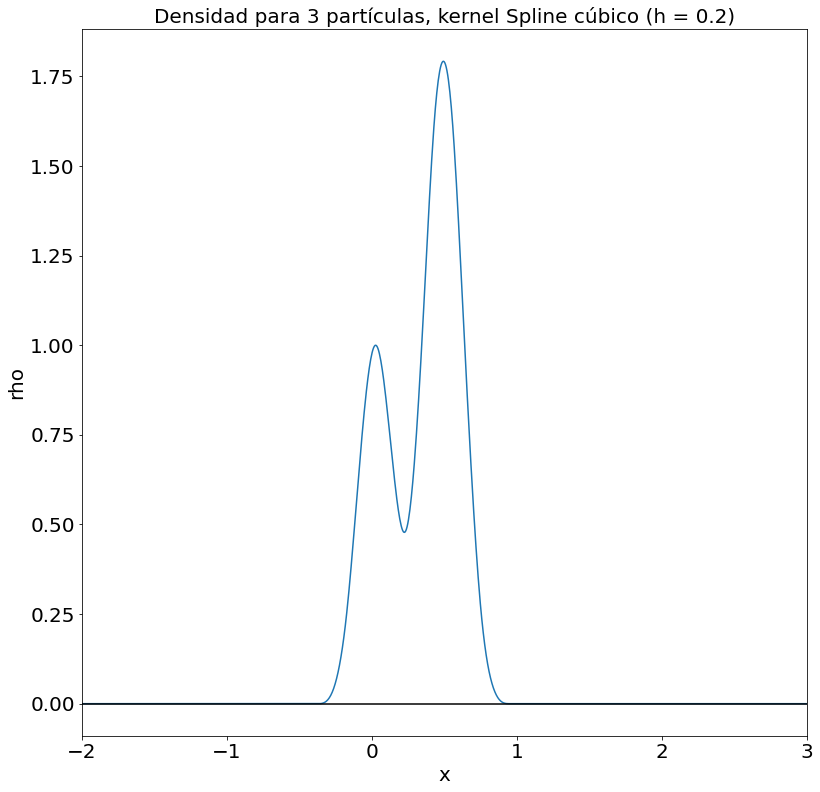

In [281]:
plt.figure(figsize=(13,13))
plt.plot(t,rho_s)
plt.axhline(0,c='k')
plt.xlim(-2,L+2)
plt.xlabel('x',fontsize=20)
plt.ylabel('rho',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, kernel Spline cúbico (h = {0.2})',fontsize=20);

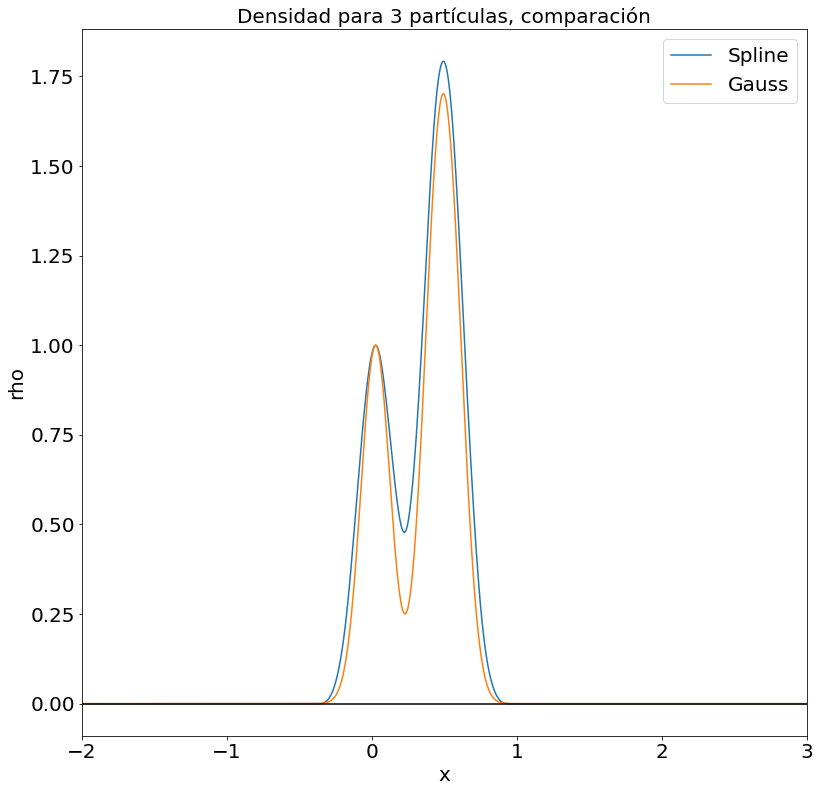

In [282]:
#Parecidas, comparemos:

plt.figure(figsize=(13,13))
plt.plot(t,rho_s,label='Spline')
plt.plot(t,rho_g,label='Gauss')
plt.axhline(0,c='k')
plt.xlim(-2,L+2)
plt.xlabel('x',fontsize=20)
plt.ylabel('rho',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, comparación',fontsize=20)

plt.legend(fontsize=20);

## Si normalizamos:

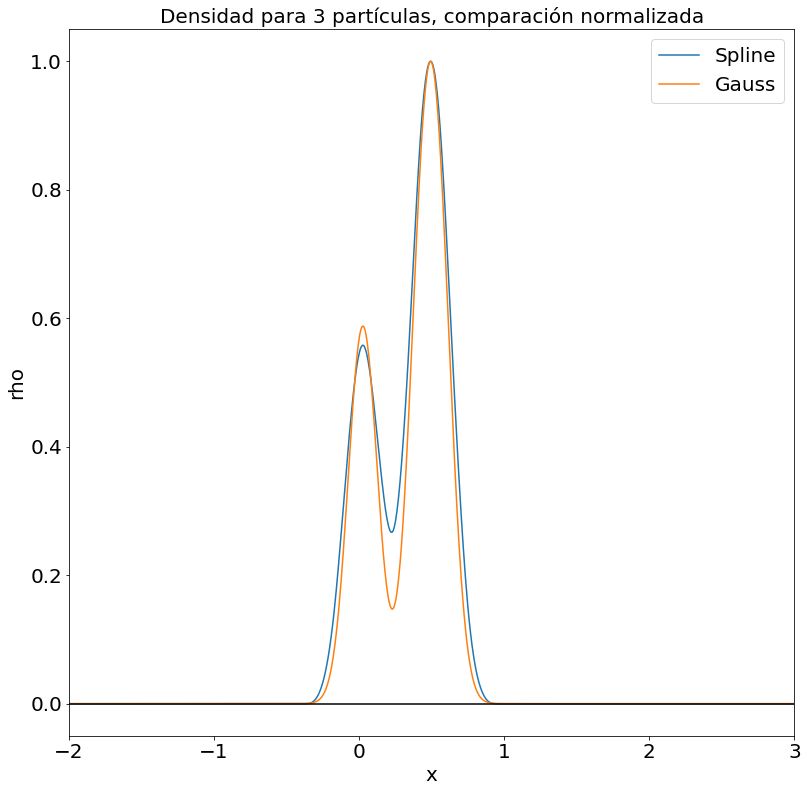

In [283]:
#Normalicemos:
rho_s = rho_s/max(rho_s)
rho_g = rho_g/max(rho_g)

plt.figure(figsize=(13,13))
plt.plot(t,rho_s,label='Spline')
plt.plot(t,rho_g,label='Gauss')
plt.axhline(0,c='k')
plt.xlim(-2,L+2)
plt.xlabel('x',fontsize=20)
plt.ylabel('rho',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, comparación normalizada',fontsize=20)

plt.legend(fontsize=20);

## Ahora si, aumentemos la cantidad de partículas y hagamos un kernel Gausseano 2-D:

## Box de lado 10:

In [345]:
L = 10 #Lado del box
n = 1000 #cant de partículas

#Tiramos las partículas y las guardamos en un DataFrame, donde a cada una le asignaremos un número de celda

np.random.seed(2) #Para poder replicar resultados
pos = np.random.uniform(0,L,(n,2))
df = pd.DataFrame(pos,columns=['x','y']) #Guardamos (x,y)

df

,x,y
0,4.359949,0.259262
1,5.496625,4.353224
2,4.203678,3.303348
3,2.046486,6.192710
4,2.996547,2.668273
...,...,...
995,1.160535,1.041797
996,1.044064,8.741692
997,8.955472,3.398951
998,8.845081,9.404450


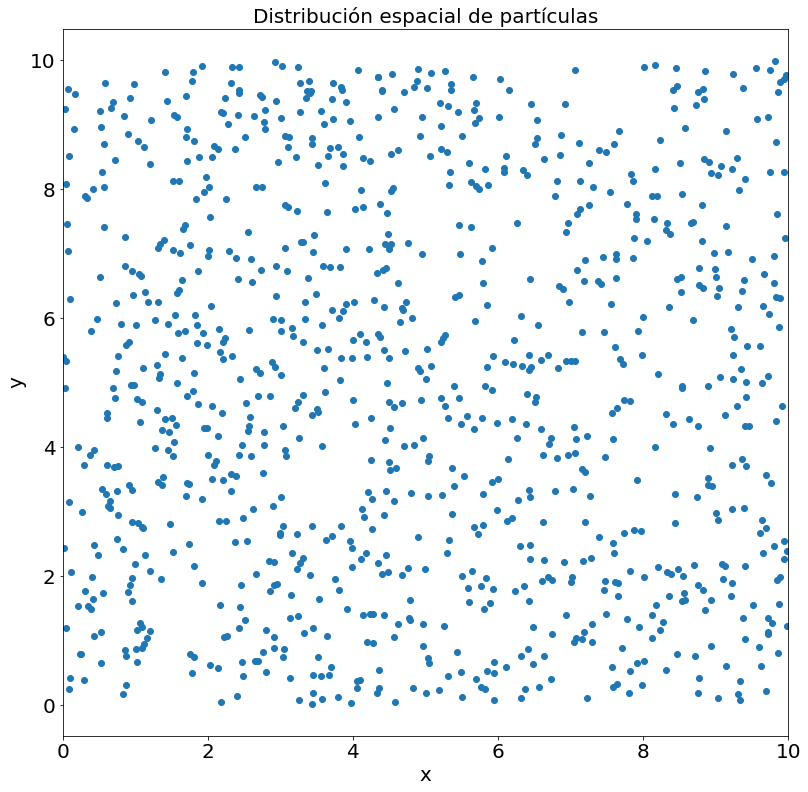

In [346]:
plt.figure(figsize=(13,13))
plt.scatter(df['x'],df['y'])
plt.xlim(0,L)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Distribución espacial de partículas',fontsize=20);

In [347]:
tx = np.linspace(0,L,100)
ty = np.linspace(0,L,100)
xx,yy = np.meshgrid(tx,ty)

In [348]:
def Gauss2D(mux,muy,sigma,x,y):
    z = np.exp(-0.5*((((x-mux)/sigma)**2)+((y-muy)/sigma)**2))
    return z

"""rho_g = np.zeros(len(tx),len(ty))
for i in range(len(df)):
    rho_g += Gauss(df['x'][i],0.1,t)""";

rho_g = np.zeros((len(tx),len(ty)))
for i in range(len(df)):
    rho_g += Gauss2D(df['x'][i],df['y'][i],0.1,xx,yy)

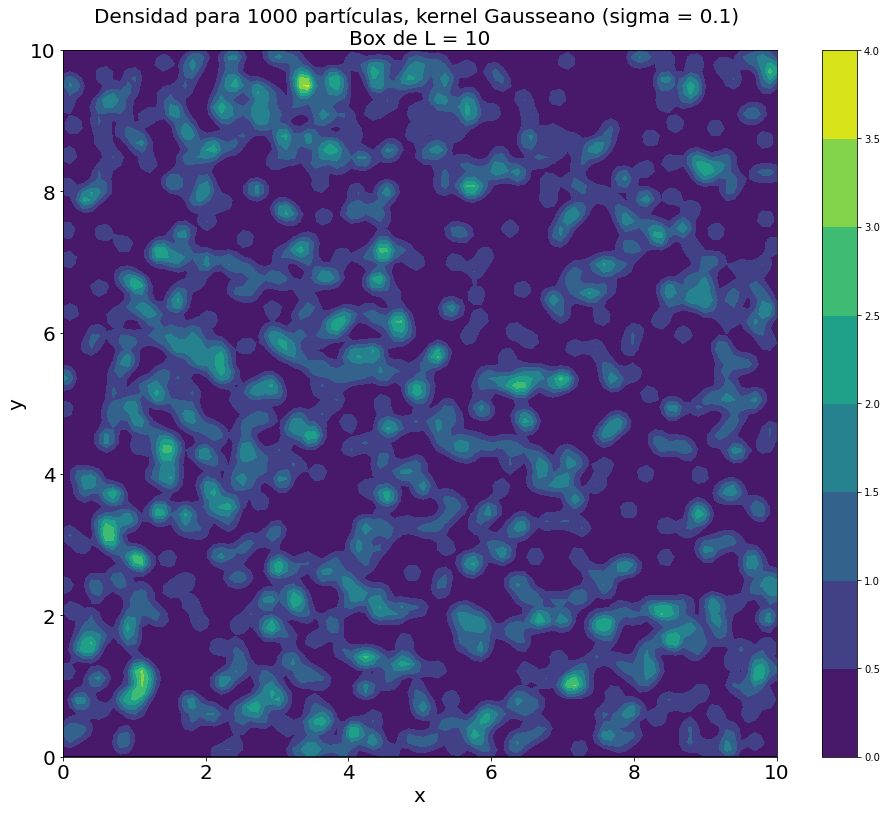

In [349]:
plt.figure(figsize=(16,13))
graf = plt.contourf(xx,yy,rho_g)
plt.colorbar(graf)
plt.axhline(0,c='k')
plt.xlim(0,L)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, kernel Gausseano (sigma = 0.1) \nBox de L = 10',fontsize=20);

## Box de lado 1:

In [350]:
L = 1 #Lado del box
n = 1000 #cant de partículas

#Tiramos las partículas y las guardamos en un DataFrame, donde a cada una le asignaremos un número de celda

np.random.seed(2) #Para poder replicar resultados
pos = np.random.uniform(0,L,(n,2))
df = pd.DataFrame(pos,columns=['x','y']) #Guardamos (x,y)

df

,x,y
0,0.435995,0.025926
1,0.549662,0.435322
2,0.420368,0.330335
3,0.204649,0.619271
4,0.299655,0.266827
...,...,...
995,0.116053,0.104180
996,0.104406,0.874169
997,0.895547,0.339895
998,0.884508,0.940445


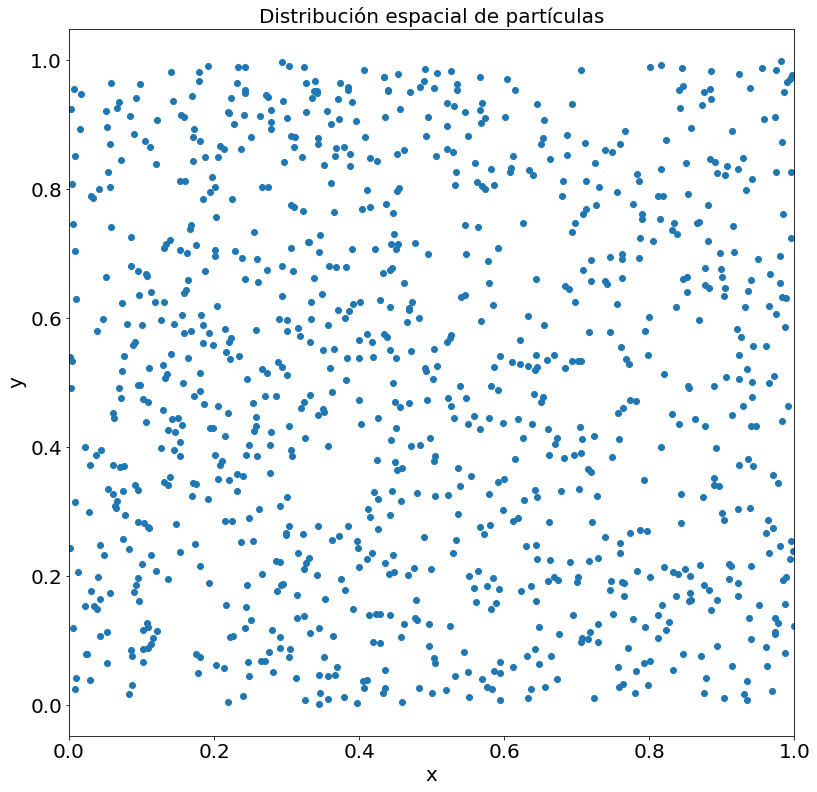

In [351]:
plt.figure(figsize=(13,13))
plt.scatter(df['x'],df['y'])
plt.xlim(0,L)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Distribución espacial de partículas',fontsize=20);

In [352]:
tx = np.linspace(0,L,100)
ty = np.linspace(0,L,100)
xx,yy = np.meshgrid(tx,ty)

In [353]:
def Gauss2D(mux,muy,sigma,x,y):
    z = np.exp(-0.5*((((x-mux)/sigma)**2)+((y-muy)/sigma)**2))
    return z

"""rho_g = np.zeros(len(tx),len(ty))
for i in range(len(df)):
    rho_g += Gauss(df['x'][i],0.1,t)""";

rho_g = np.zeros((len(tx),len(ty)))
for i in range(len(df)):
    rho_g += Gauss2D(df['x'][i],df['y'][i],0.1,xx,yy)

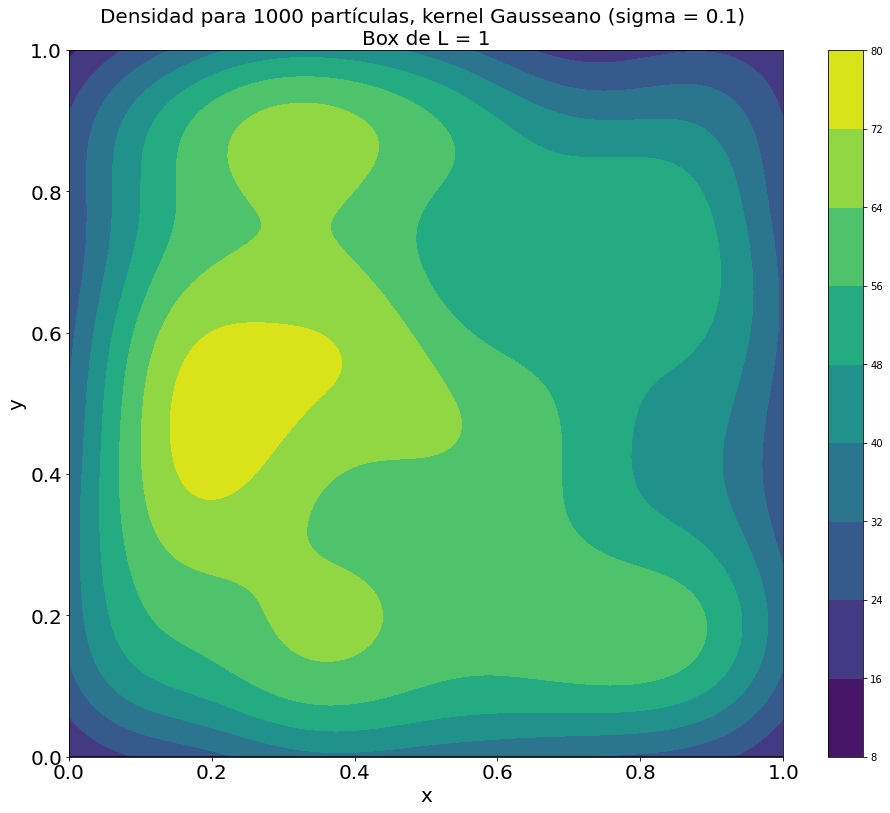

In [355]:
plt.figure(figsize=(16,13))
graf = plt.contourf(xx,yy,rho_g)
plt.colorbar(graf)
plt.axhline(0,c='k')
plt.xlim(0,L)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Densidad para {n} partículas, kernel Gausseano (sigma = 0.1) \nBox de L = 1',fontsize=20);